***Summary***: The complete Shakya et al. dataset and subsamples of this dataset (10%, 25%, and 50%) were trimmed at quality scores of 2 and 30 using trimmomatic and classified with sourmash gather.All sourmash signatures were calculated with --scaled values of 10000, k values of 21, 31 and 51, and abundance tracking. Classifiication was performed with both genbank and refseq databases created in may of 2017.

***Goals***:
- To determine how both conservative and aggresive quality trimming of reads affects classification results 
- To determine what fraction of the dataset is required to detect all these genomes

The data used in this notebook is  stored on the open science framework 
(https://osf.io/dm938/) and can be retrieved using the following command. 

```
for i in $(cat gather_output_names.txt)
do 
    osf -u <user_name> \
        -p dm938 \
        fetch osfstorage/taxonomic_classification/sourmash/${i} ${PWD}/${i} 
    echo ${i}
done
```
(gather_output_names.txt can be found [here](https://github.com/dahak-metagenomics/dahak/tree/master/workflows/taxonomic_classification))

In [38]:
%matplotlib inline

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
import os
import glob


#### Merge all csvs into a single data frame named "all_files"
path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "*gather.output.csv")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files


df = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df = df.append(file_df)

#### Add a column titled "file_name" that contains the name of the file where the data came from 
    df['file_name'] = df['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
df

,intersect_bp,f_orig_query,f_match,f_unique_to_query,name,filename,md5,file_name
0,7420000,0.039353,0.994638,0.039353,BX119912.1 Rhodopirellula baltica SH 1 complet...,refseq-k51.sbt.json,0158c8fed04b7805bd8b6c9b1deb0457,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
1,5270000,0.027950,0.715061,0.027950,"BA000019.2 Nostoc sp. PCC 7120 DNA, complete g...",refseq-k51.sbt.json,65dee47a2f5d0719c93a0f14398574d4,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
2,4530000,0.024025,0.643466,0.024025,"CP000875.1 Herpetosiphon aurantiacus DSM 785, ...",refseq-k51.sbt.json,d5fb91a1945683fed1128ce3a59570eb,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
3,4350000,0.023071,0.782374,0.023071,"CP000909.1 Chloroflexus aurantiacus J-10-fl, c...",refseq-k51.sbt.json,8f4d200ad2557c0da2a57913c21c0354,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
4,4240000,0.022487,0.959276,0.022487,"AP009153.1 Gemmatimonas aurantiaca T-27 DNA, c...",refseq-k51.sbt.json,d39f70f284ac206dee2ee61b8a680a8b,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
5,4060000,0.021533,0.955294,0.021533,CP001472.1 Acidobacterium capsulatum ATCC 5119...,refseq-k51.sbt.json,25e2ad37d2f90d5d6ed8ec0521b7a059,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
6,4000000,0.021215,0.657895,0.021215,AE015928.1 Bacteroides thetaiotaomicron VPI-54...,refseq-k51.sbt.json,0b4c0b9a93b1998725462732d6b6a016,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
7,3840000,0.020366,0.962406,0.020366,CH959317.1 Sulfitobacter sp. NAS-14.1 scf_1099...,refseq-k51.sbt.json,4191f9193be96dbebba5ebaabc75dcf1,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
8,3770000,0.019995,0.956853,0.019995,"AE017180.2 Geobacter sulfurreducens PCA, compl...",refseq-k51.sbt.json,d1c43766838dfffdefe2cf17d0742d12,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
9,3510000,0.018616,0.611498,0.018616,"CP000850.1 Salinispora arenicola CNS-205, comp...",refseq-k51.sbt.json,9429201e056e9e0f78ac9d9594289e82,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...


KeyboardInterrupt: 

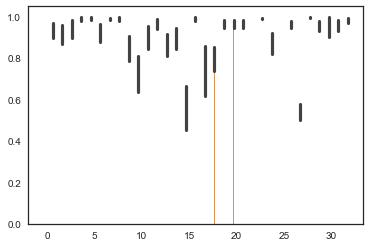

In [49]:
#Genome fraction 
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")

g=sns.barplot(x="name", y="f_match", hue="name", data=df)

for item in g.get_xticklabels():
    item.set_rotation(45)

In [84]:
path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "SRR606249.trim2*")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files

df_trim2 = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df_trim2 = df_trim2.append(file_df)
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_trim2['file_name'] = df_trim2['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
df_trim2


,intersect_bp,f_orig_query,f_match,f_unique_to_query,name,filename,md5,file_name
0,9200000,0.020929,0.976645,0.020929,CP000270.1 Burkholderia xenovorans LB400 chrom...,refseq-k21.sbt.json,c7a74b6e204c56a29a67582e3003c4d5,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
1,6860000,0.015606,0.998544,0.015606,"BA000019.2 Nostoc sp. PCC 7120 DNA, complete g...",refseq-k21.sbt.json,49dcc05178ac72326de9646578f376e3,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
2,6740000,0.015333,1.000000,0.015333,"CP000875.1 Herpetosiphon aurantiacus DSM 785, ...",refseq-k21.sbt.json,83bd36beaea8594fb28d3e4e44fe563f,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
3,6600000,0.015014,1.000000,0.015014,BX119912.1 Rhodopirellula baltica SH 1 complet...,refseq-k21.sbt.json,7f160cdfaaa1bd3cb9345dde78061521,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
4,6120000,0.013922,1.000000,0.013922,AE015928.1 Bacteroides thetaiotaomicron VPI-54...,refseq-k21.sbt.json,12cd55e54f72933ac8eb37ca369663bd,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
5,5390000,0.012262,0.987179,0.012262,"CP000850.1 Salinispora arenicola CNS-205, comp...",refseq-k21.sbt.json,181a22864d94d8556d60def06b382102,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
6,5290000,0.012034,0.998113,0.012034,AE010299.1 Methanosarcina acetivorans str. C2A...,refseq-k21.sbt.json,39e441c33cf5bedcec5b037b488c5e64,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
7,5010000,0.011397,1.000000,0.011397,"AP009153.1 Gemmatimonas aurantiaca T-27 DNA, c...",refseq-k21.sbt.json,c35c32df9d43c14ed9f81e35f2331e06,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
8,4960000,0.011283,0.966797,0.011261,CP014013.1 Bordetella bronchiseptica strain AT...,refseq-k21.sbt.json,dbd5838d64d37ec1e2472188b92e2873,SRR606249.trim2.scaled10k.k21_31_51.sig.k21
9,4850000,0.011033,0.993852,0.011033,"CP001252.1 Shewanella baltica OS223, complete ...",refseq-k21.sbt.json,ec7c5a0601fd589b6ca7f69af6b7d4c3,SRR606249.trim2.scaled10k.k21_31_51.sig.k21


In [85]:
path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "SRR606249.trim30*")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files

df_trim30 = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df_trim30 = df_trim30.append(file_df)
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_trim30['file_name'] = df_trim30['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
df_trim30

,intersect_bp,f_orig_query,f_match,f_unique_to_query,name,filename,md5,file_name
0,9040000,0.039938,0.959660,0.039938,CP000270.1 Burkholderia xenovorans LB400 chrom...,refseq-k21.sbt.json,c7a74b6e204c56a29a67582e3003c4d5,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
1,6860000,0.030307,0.998544,0.030307,"BA000019.2 Nostoc sp. PCC 7120 DNA, complete g...",refseq-k21.sbt.json,49dcc05178ac72326de9646578f376e3,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
2,6730000,0.029733,0.998516,0.029733,"CP000875.1 Herpetosiphon aurantiacus DSM 785, ...",refseq-k21.sbt.json,83bd36beaea8594fb28d3e4e44fe563f,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
3,6600000,0.029158,1.000000,0.029158,BX119912.1 Rhodopirellula baltica SH 1 complet...,refseq-k21.sbt.json,7f160cdfaaa1bd3cb9345dde78061521,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
4,6120000,0.027038,1.000000,0.027038,AE015928.1 Bacteroides thetaiotaomicron VPI-54...,refseq-k21.sbt.json,12cd55e54f72933ac8eb37ca369663bd,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
5,5360000,0.023680,0.981685,0.023680,"CP000850.1 Salinispora arenicola CNS-205, comp...",refseq-k21.sbt.json,181a22864d94d8556d60def06b382102,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
6,5290000,0.023371,0.998113,0.023371,AE010299.1 Methanosarcina acetivorans str. C2A...,refseq-k21.sbt.json,39e441c33cf5bedcec5b037b488c5e64,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
7,5010000,0.022134,1.000000,0.022134,"AP009153.1 Gemmatimonas aurantiaca T-27 DNA, c...",refseq-k21.sbt.json,c35c32df9d43c14ed9f81e35f2331e06,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
8,4860000,0.021471,0.947266,0.021427,CP014013.1 Bordetella bronchiseptica strain AT...,refseq-k21.sbt.json,dbd5838d64d37ec1e2472188b92e2873,SRR606249.trim30.scaled10k.k21_31_51.sig.k21
9,4830000,0.021339,0.989754,0.021339,"CP001252.1 Shewanella baltica OS223, complete ...",refseq-k21.sbt.json,ec7c5a0601fd589b6ca7f69af6b7d4c3,SRR606249.trim30.scaled10k.k21_31_51.sig.k21


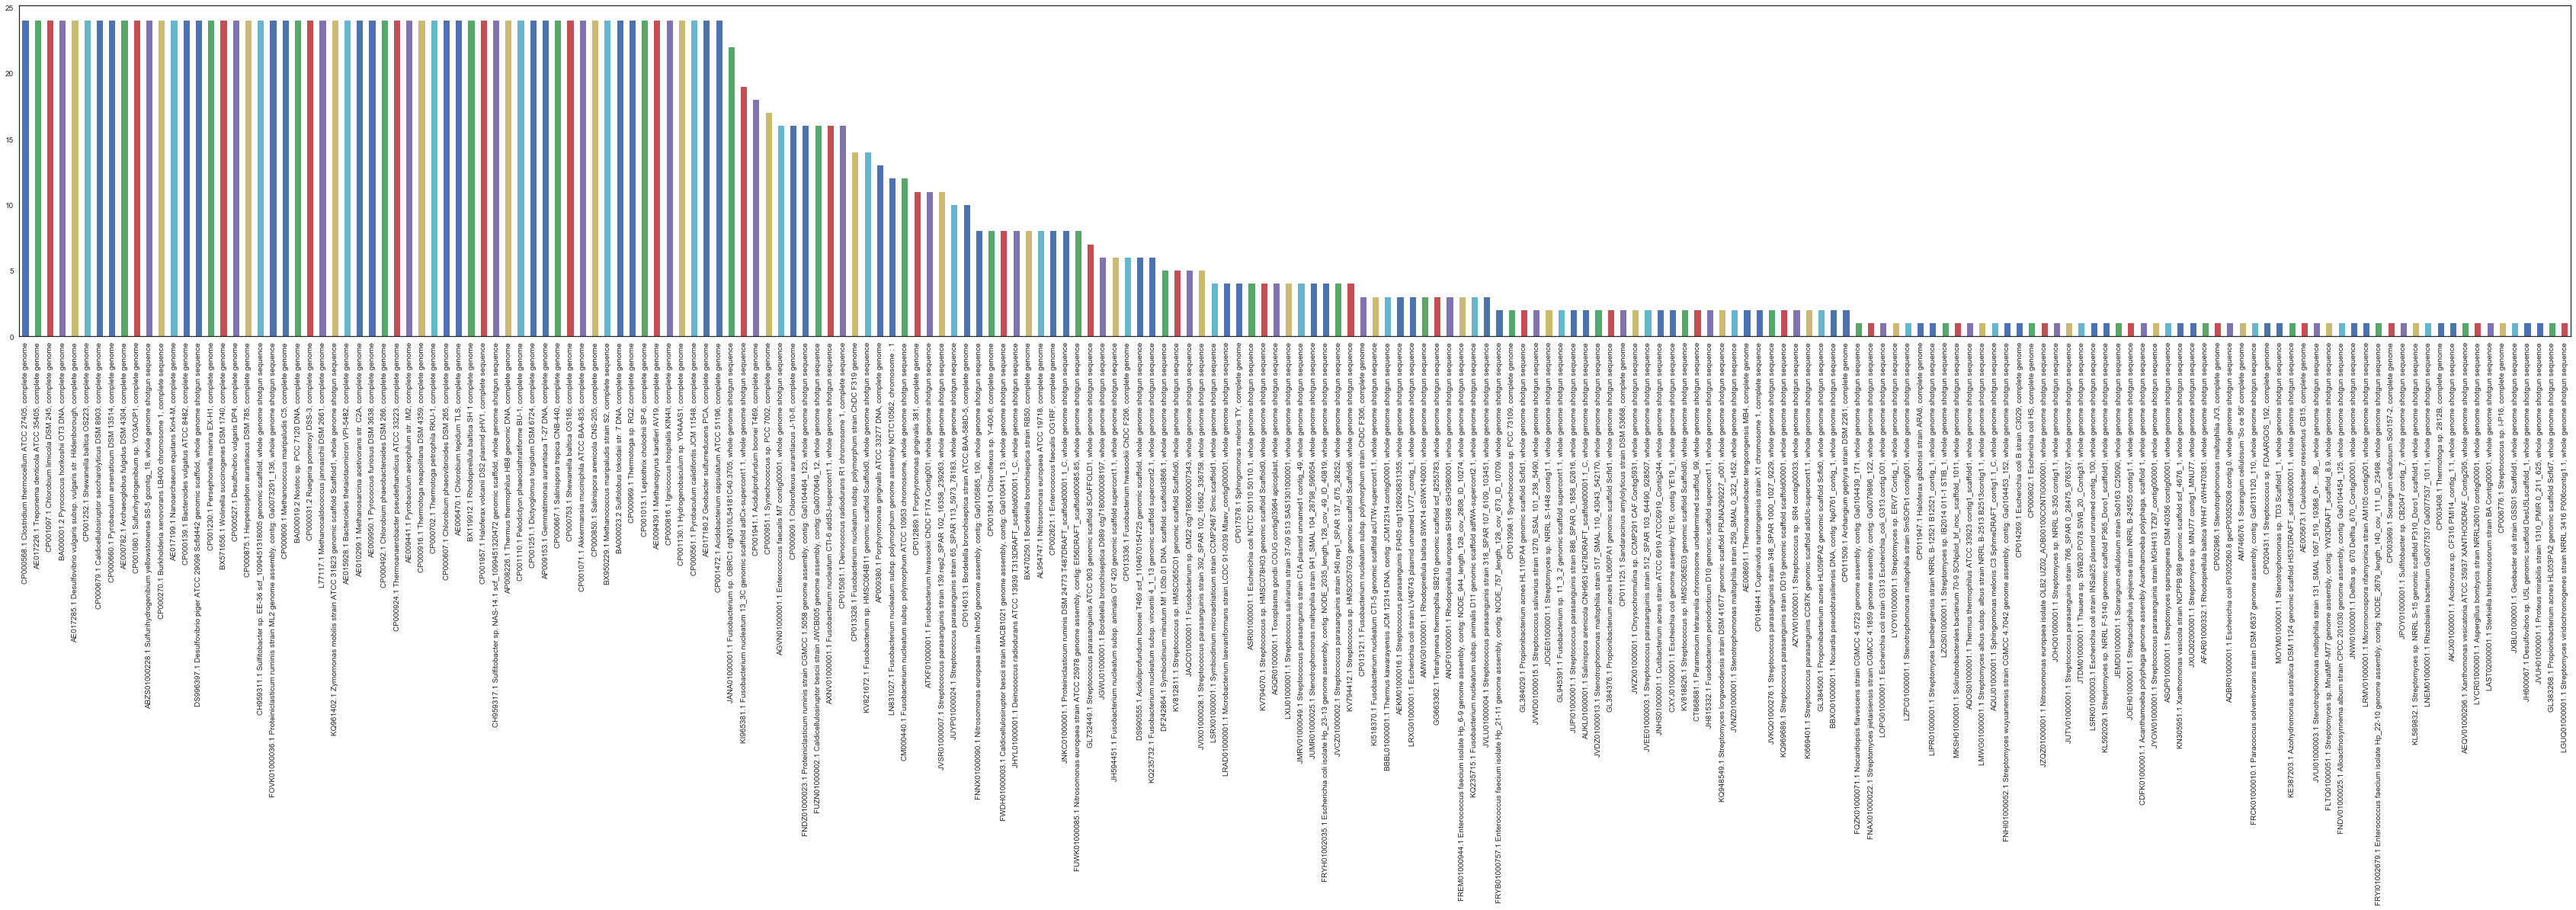

In [50]:
# Visual representation of all of the OTUs detected at in the complete and subsampled datasets,
# and k values of pof 
df['name'].value_counts().plot(kind="bar", figsize = (60,8))

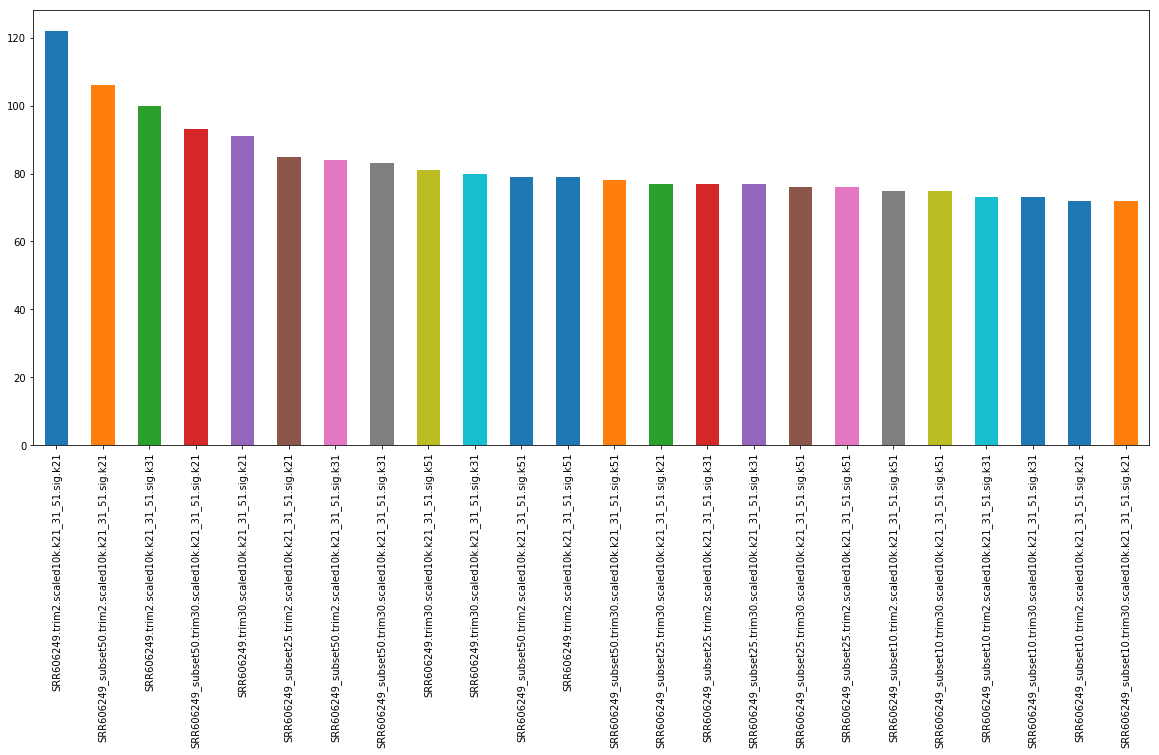

In [41]:
df['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

In [123]:
df_counts = pd.DataFrame()
df_counts2 = pd.DataFrame()
df_counts['counts'] = df_trim2['file_name'].value_counts()
df_counts2['counts2'] = df_trim30['file_name'].value_counts()
#frames = [df_counts, df_counts2]
#result = pd.concat(frames)
#result
result = df_counts.join(df_counts2, how='outer')
result

,counts,counts2
SRR606249.trim2.scaled10k.k21_31_51.sig.k21,122.0,NaN
SRR606249.trim2.scaled10k.k21_31_51.sig.k31,100.0,NaN
SRR606249.trim2.scaled10k.k21_31_51.sig.k51,79.0,NaN
SRR606249.trim30.scaled10k.k21_31_51.sig.k21,NaN,91.0
SRR606249.trim30.scaled10k.k21_31_51.sig.k31,NaN,80.0
SRR606249.trim30.scaled10k.k21_31_51.sig.k51,NaN,81.0


In [114]:
df_counts2

,counts2
SRR606249.trim30.scaled10k.k21_31_51.sig.k21,91
SRR606249.trim30.scaled10k.k21_31_51.sig.k51,81
SRR606249.trim30.scaled10k.k21_31_51.sig.k31,80


IndexError: too many indices for array

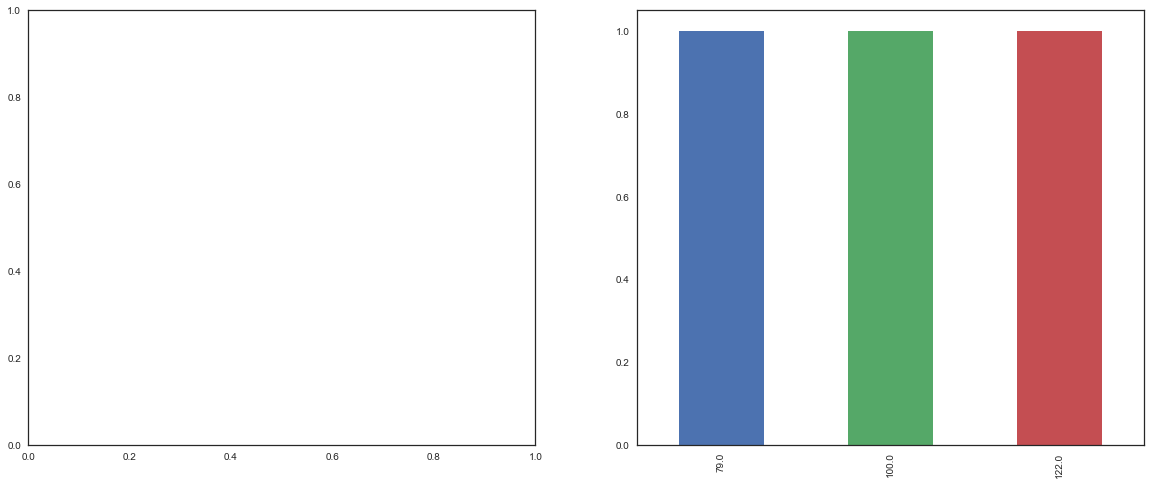

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2)

result['counts'].value_counts().plot(kind="bar", figsize = (20,8)).plot(ax=axes[0,0]);
result['counts_2'].value_counts().plot(kind="bar", figsize = (20,8)).plot(ax=axes[0,1]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc522e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d093c88>]], dtype=object)

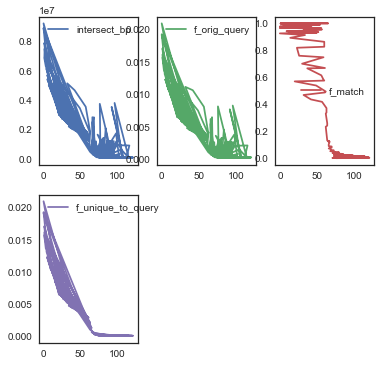

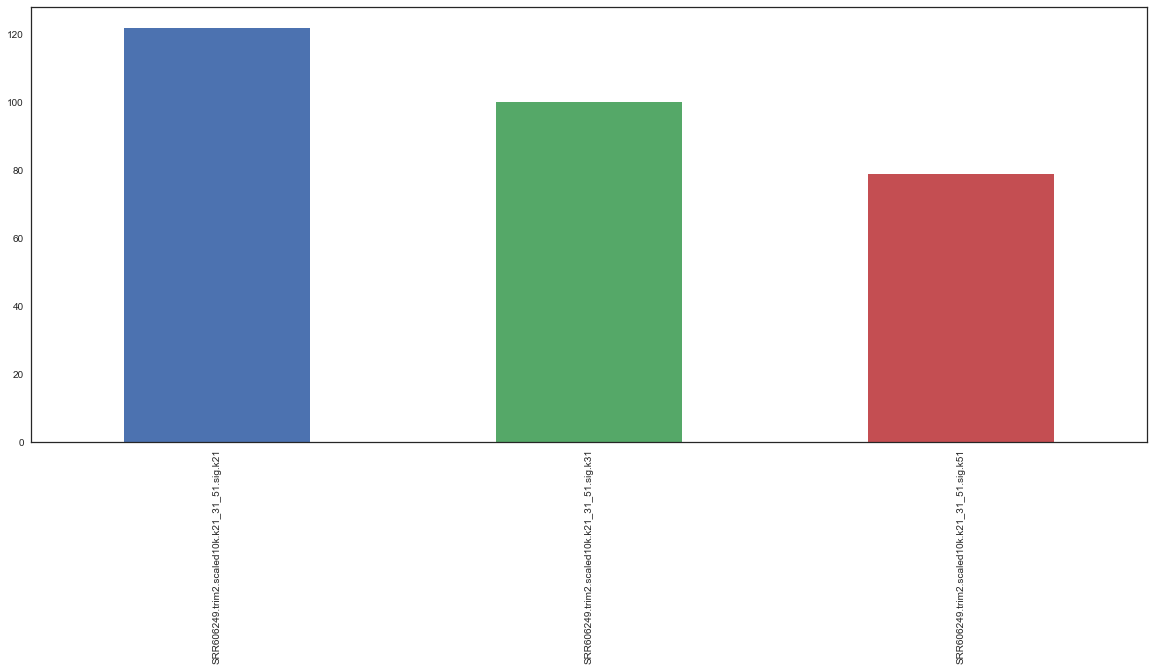

In [68]:
# Visual representation the number of unique OTUs with trimmed at a quality score or 2. 
df_trim2['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

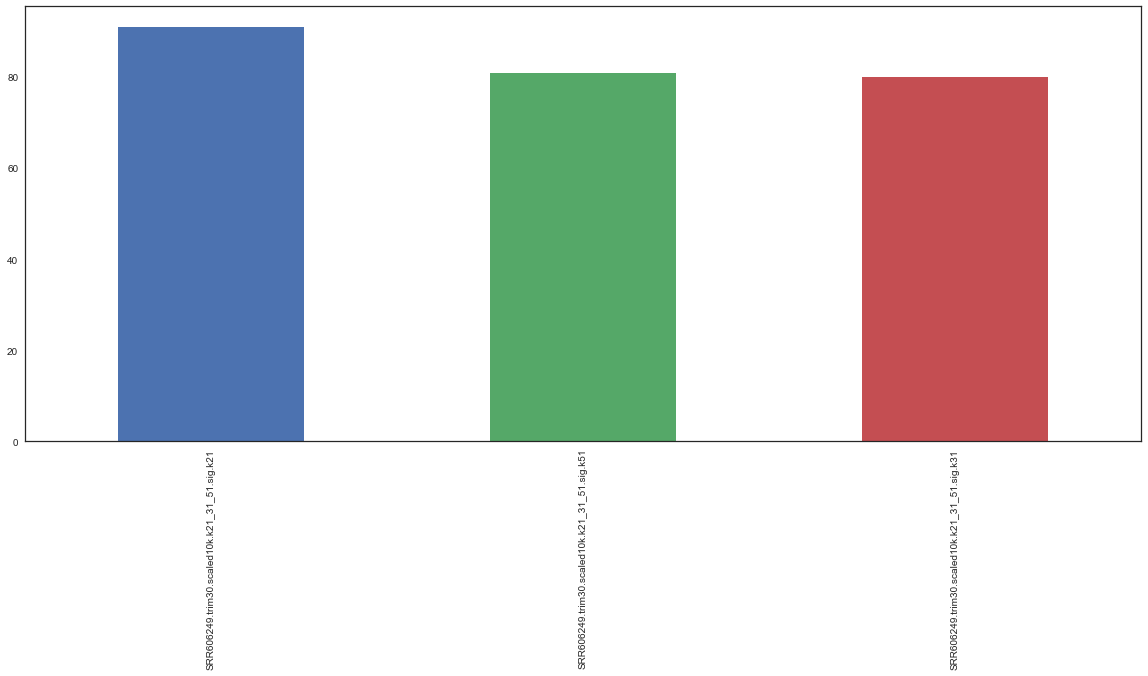

In [69]:
df_trim30['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

In [34]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=
                               2, ncols=1)
df_trim2['file_name'].value_counts().plot(kind="bar", figsize = (20,8), ax=ax1)
df_trim30['file_name'].value_counts().plot(kind="bar", figsize = (20,8)), ax=ax2)

SyntaxError: invalid syntax (<ipython-input-34-58836e775536>, line 6)

In [9]:
# create new dataframe with name a file_name columns
new = df[['name', 'file_name']].copy()

In [10]:
#create empty dataframe 
results = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results['name'] = new['name']
for col in new['file_name'].unique():
    results[col] = ((col == new['file_name'])
    .astype(object)
    .replace(True, 1)
    .replace(False, 0))
results = results.groupby('name').agg(sum).reset_index()
results.to_csv('results.csv')

### Change kernel to R 

In [4]:
gather <- read.csv("results.csv", header = T, sep = ",")
gather

X,name,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51,⋯,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,"ABZS01000228.1 Sulfurihydrogenibium yellowstonense SS-5 gcontig_18, whole genome shotgun sequence",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,"AE000782.1 Archaeoglobus fulgidus DSM 4304, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,"AE005673.1 Caulobacter crescentus CB15, complete genome",0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,"AE006470.1 Chlorobium tepidum TLS, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
4,"AE008691.1 Thermoanaerobacter tengcongensis MB4, complete genome",0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,"AE009439.1 Methanopyrus kandleri AV19, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
6,"AE009441.1 Pyrobaculum aerophilum str. IM2, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
7,"AE009950.1 Pyrococcus furiosus DSM 3638, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
8,"AE010299.1 Methanosarcina acetivorans str. C2A, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
9,"AE015928.1 Bacteroides thetaiotaomicron VPI-5482, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


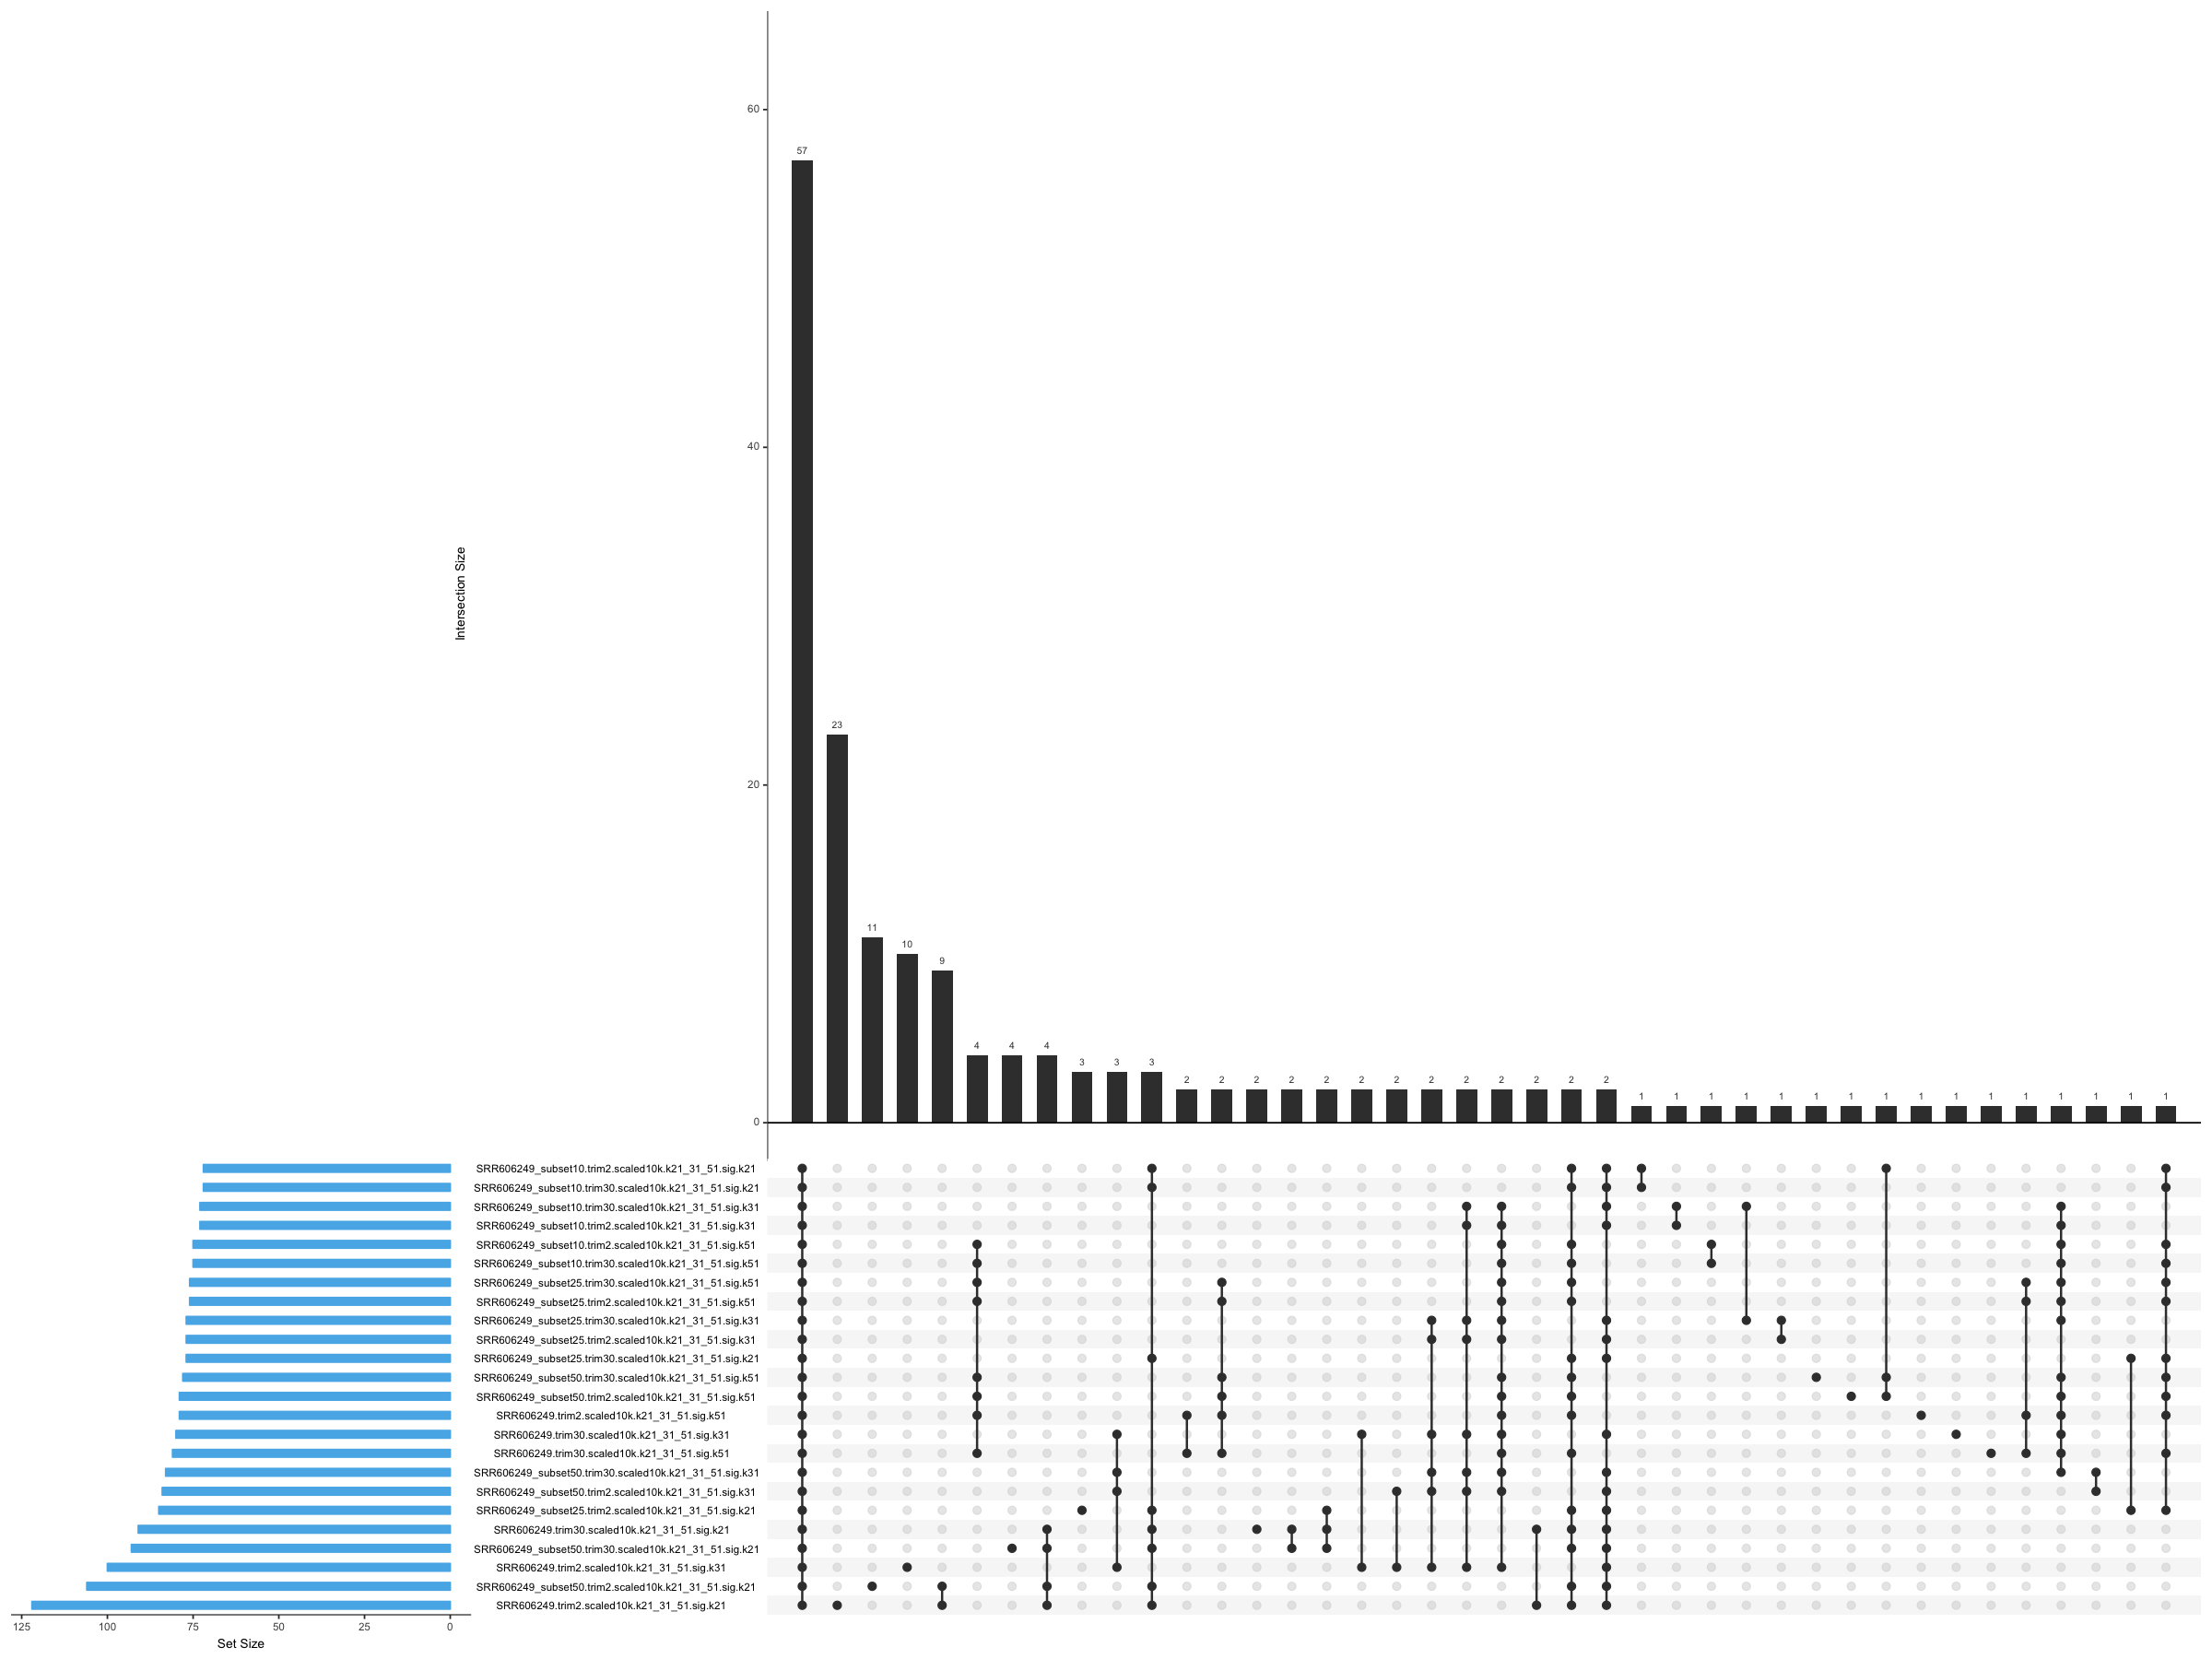

In [4]:
library(UpSetR)
#Change plot size to 20X20
options(repr.plot.width=20, repr.plot.height=15)
upset(gather, nsets = 24, sets.bar.color = "#56B4E9", order.by = "freq")

In [11]:
# Combined genus and species in a new column genus_species
# First, make new columns with the second(genus) and third(species) fields from 
# the column 'name" in dataframe 'new'
new['genus'] = new['name'].str.split(' ').str[1]
new['species'] = new['name'].str.split(' ').str[2]
# Combined the columns 'genus' and 'species' with a space in between
new["genus_species"] = new["genus"].map(str) +[" "] + new["species"]
#Write the new df to a csv named 'new2.csv'
new.to_csv('new2.csv')
# Print new
new

,name,file_name,genus,species,genus_species
0,BX119912.1 Rhodopirellula baltica SH 1 complet...,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Rhodopirellula,baltica,Rhodopirellula baltica
1,"BA000019.2 Nostoc sp. PCC 7120 DNA, complete g...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Nostoc,sp.,Nostoc sp.
2,"CP000875.1 Herpetosiphon aurantiacus DSM 785, ...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Herpetosiphon,aurantiacus,Herpetosiphon aurantiacus
3,"CP000909.1 Chloroflexus aurantiacus J-10-fl, c...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Chloroflexus,aurantiacus,Chloroflexus aurantiacus
4,"AP009153.1 Gemmatimonas aurantiaca T-27 DNA, c...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Gemmatimonas,aurantiaca,Gemmatimonas aurantiaca
5,CP001472.1 Acidobacterium capsulatum ATCC 5119...,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Acidobacterium,capsulatum,Acidobacterium capsulatum
6,AE015928.1 Bacteroides thetaiotaomicron VPI-54...,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Bacteroides,thetaiotaomicron,Bacteroides thetaiotaomicron
7,CH959317.1 Sulfitobacter sp. NAS-14.1 scf_1099...,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Sulfitobacter,sp.,Sulfitobacter sp.
8,"AE017180.2 Geobacter sulfurreducens PCA, compl...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Geobacter,sulfurreducens,Geobacter sulfurreducens
9,"CP000850.1 Salinispora arenicola CNS-205, comp...",SRR606249_subset10.trim2.scaled10k.k21_31_51.s...,Salinispora,arenicola,Salinispora arenicola


In [17]:
#Create an empty dataframe 
results2 = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results2['genus_species'] = new['genus_species']
for col in new['file_name'].unique():
    results2[col] = ((col == new['file_name'])
    #.astype(object)
    .replace(True, 1)
    .replace(False, 0))
results2 = results2.groupby('genus_species').agg(sum).reset_index()
#results2.to_csv('results2.csv')
results2 

,genus_species,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k51,...,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,Rhodopirellula baltica,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nostoc sp.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Herpetosiphon aurantiacus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Chloroflexus aurantiacus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gemmatimonas aurantiaca,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Acidobacterium capsulatum,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bacteroides thetaiotaomicron,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Sulfitobacter sp.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Geobacter sulfurreducens,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Salinispora arenicola,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
gather2 <- read.csv("results2.csv", header = T, sep = ",")
gather2

X,genus_species,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51,⋯,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,Acanthamoeba polyphaga,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,Acidobacterium capsulatum,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,Acidovorax sp.,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
3,Aciduliprofundum boonei,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
4,Akkermansia muciniphila,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
5,Alloactinosynnema album,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,Archaeoglobus fulgidus,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
7,Archangium gephyra,0,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,0
8,Aspergillus bombycis,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,Azohydromonas australica,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


In [2]:
library(UpSetR)
#Change plot size to 20X20
options(repr.plot.width=20, repr.plot.height=15)
upset(gather2)

ERROR: Error in start_col:end_col: argument of length 0
